In [82]:
import healpy as hp
import numpy as np
import pysm
from pysm.nominal import models
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [83]:
def smooth_mask(mask, fwhm, l=0.5):
    mask = hp.smoothing(mask, np.radians(fwhm))
    lim=max(mask)*l
    mask[mask > lim]=1
    mask[mask <= lim]=0
    return mask

In [88]:
def make_mask(sig_to_CMB_ratio, freq, nside):
    dust_model = "SO_d0"
    synch_model = "SO_s0"
    cmb_model = "c1"
    sky = pysm.Sky({"dust":models(dust_model, 128), "synchrotron":models(synch_model, 128)})
    cmb_sky = pysm.Sky({"cmb":models(cmb_model, 128)})
    sig = sky.signal()(freq)
    cmb = cmb_sky.signal()(freq)
    sig_smt = hp.smoothing(sig, fwhm = np.radians(1.))
    cmb_smt = hp.smoothing(cmb, fwhm = np.radians(1.))
    thrQ = np.std(cmb_smt[1])
    thrU = np.std(cmb_smt[2])
    thr = (thrQ+thrU)/2.
    mask_test = np.copy(sig_smt)*0.+1.
    mask_test[1][sig_smt[1]>sig_to_CMB_ratio*thr] = 0
    mask_test[2][sig_smt[2]>sig_to_CMB_ratio*thr] = 0
    mask_tot = mask_test[2]*mask_test[1]
    mask_tot_smt = smooth_mask(mask_tot, 10.)
    mask_tot_smt = hp.ud_grade(mask_tot_smt, nside)
    mask_tot_smt[mask_tot_smt<0.5] = 0.
    mask_tot_smt[mask_tot_smt>=0.5] = 1.
    return mask_tot_smt

In [26]:
nside = 256
dust_model = "SO_d0"
synch_model = "SO_s0"
cmb_model = "c1"
sky = pysm.Sky({"dust":models(dust_model, nside), "synchrotron":models(synch_model, nside)})
cmb_sky = pysm.Sky({"cmb":models(cmb_model, nside)})

In [27]:
sig = sky.signal()(93.)
cmb = cmb_sky.signal()(93.)

In [30]:
sig_smt = hp.smoothing(sig, fwhm = np.radians(1.))
cmb_smt = hp.smoothing(cmb, fwhm = np.radians(1.))

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


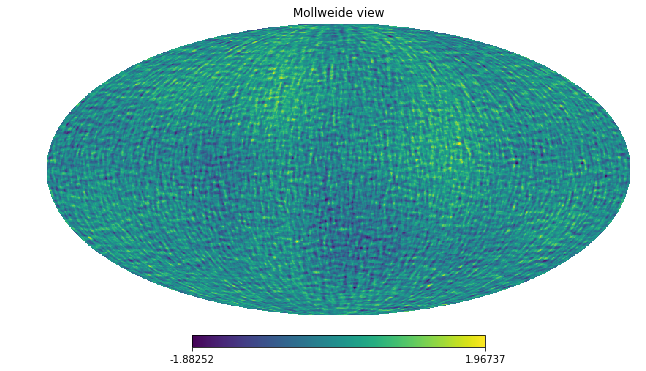

In [33]:
hp.mollview(cmb_smt[1])

In [35]:
thrQ = np.std(cmb_smt[1])
thrU = np.std(cmb_smt[2])

In [37]:
thr = (thrQ+thrU)/2.

In [77]:
mask_test = np.copy(sig_smt)*0.+1.
mask_test[1][sig_smt[1]>1.5*thr] = 0
mask_test[2][sig_smt[2]>1.5*thr] = 0
mask_tot = mask_test[2]*mask_test[1]

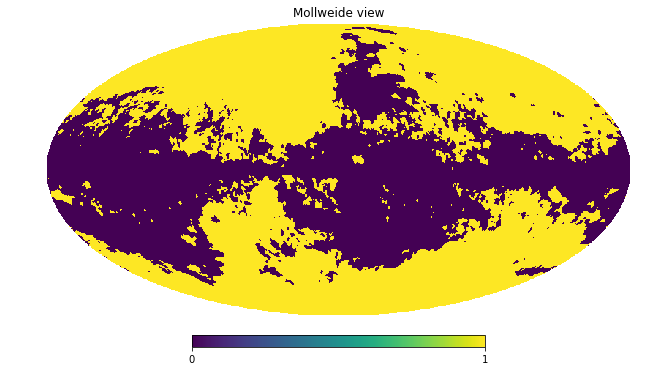

In [78]:
hp.mollview(mask_tot)

In [79]:
mask_tot_smt = smooth_mask(mask_tot, 10.)

Sigma is 254.796540 arcmin (0.074117 rad) 
-> fwhm is 600.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


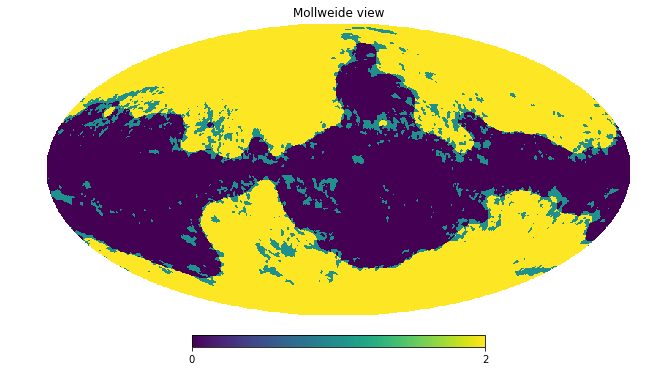

In [80]:
hp.mollview(mask_tot_smt+mask_tot)

In [109]:
mask_tot = np.zeros(hp.nside2npix(512))
for t in [1., 1.5, 2., 2.5, 3.]:
    mask = make_mask(t, 93., 512)
    mask_tot = mask_tot + mask

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 254.796540 arcmin (0.074117 rad) 
-> fwhm is 600.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 254.796540 arcmin (0.074117 rad) 
-> fwhm is 600.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 25.479654 arcmin (0.0

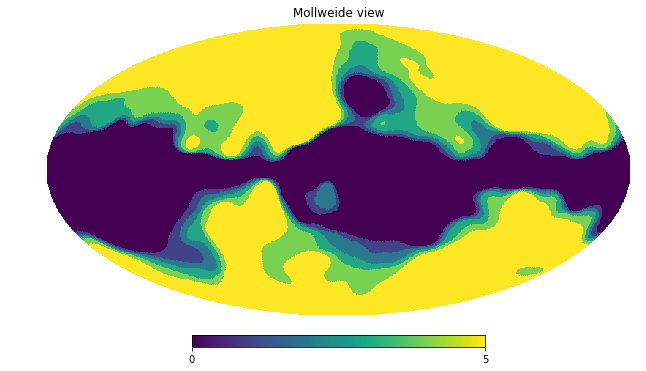

In [110]:
hp.mollview(mask_tot)